In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score, recall_score,r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression


In [409]:
file_path = ("heart_attack_vaccine_data.csv")
df = pd.read_csv(file_path);

In [410]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [411]:
df.describe()

,Patient ID,Age,Cholesterol Level,BMI
count,550.000000,550.000000,550.000000,550.000000
mean,275.500000,52.098182,223.143636,26.803273
std,158.915596,15.843192,43.267955,4.678322
min,1.000000,25.000000,150.000000,18.500000
25%,138.250000,39.000000,187.000000,23.000000
50%,275.500000,52.000000,221.000000,26.550000
75%,412.750000,66.000000,258.000000,30.700000
max,550.000000,80.000000,300.000000,35.000000


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [413]:
df = df.drop_duplicates()


In [414]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Elevated,189,26.5,No,No
1,2,27,Male,2023-07-12,2nd Dose,NaN,NaN,NaN,NaN,Agra,Elevated,150,29.1,No,Yes
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaN,NaN,NaN,Surat,High,253,21.8,No,No
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaN,NaN,NaN,Hyderabad,Normal,199,24.6,No,No


In [415]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [416]:
df.columns
print(df.shape)

(550, 15)


In [417]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Elevated,189,26.5,0,0
1,2,27,Male,2023-07-12,2nd Dose,NaN,NaN,NaN,NaN,Agra,Elevated,150,29.1,0,1
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaN,NaN,NaN,Surat,High,253,21.8,0,0
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaN,NaN,NaN,Hyderabad,Normal,199,24.6,0,0


In [418]:
# Create a flag column
df['Had_Heart_Attack'] = df['Heart Attack Date'].notna().astype(int)

# Replace severity and outcome if NaN
df['Severity'] = df['Severity'].fillna('None')
df['Outcome'] = df['Outcome'].fillna('None')

# For Pre-existing Conditions
df['Pre-existing Conditions'] = df['Pre-existing Conditions'].fillna('None')
df['Heart Attack Date'] = pd.to_datetime(df['Heart Attack Date'], errors='coerce')



In [419]:
df.head(4)


,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status,Had_Heart_Attack
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaT,None,None,Chennai,Elevated,189,26.5,0,0,0
1,2,27,Male,2023-07-12,2nd Dose,None,NaT,None,None,Agra,Elevated,150,29.1,0,1,0
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaT,None,None,Surat,High,253,21.8,0,0,0
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaT,None,None,Hyderabad,Normal,199,24.6,0,0,0


In [420]:
print(df.shape)

(550, 16)


In [421]:
bp_mapping = {
    'Normal': 1,
    'Elevated': 2,
    'High': 3,
    'Very High': 4
}
df['BP_Score'] = df['Blood Pressure'].map(bp_mapping)


In [422]:
dose_mapping = {
    '1st Dose': 1,
    '2nd Dose': 2,
    'Booster': 3
}
df['Vaccine Dose'] = df['Vaccine Dose'].map(dose_mapping)

In [423]:
gender_mapping = {
    'Male': 1,
    'Female': 0
}
df['Gender'] = df['Gender'].map(gender_mapping)

In [424]:
df['BP_Score'] = df['BP_Score'].fillna(0)
df['BP_Score'] = df['BP_Score'].astype(int)

In [425]:
df['BP_Score']

0      2
1      2
2      3
3      1
4      1
      ..
545    2
546    4
547    2
548    3
549    3
Name: BP_Score, Length: 550, dtype: int32

In [426]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status,Had_Heart_Attack,BP_Score
0,1,55,0,2021-09-25,2,Obesity,NaT,None,None,Chennai,Elevated,189,26.5,0,0,0,2
1,2,27,1,2023-07-12,2,None,NaT,None,None,Agra,Elevated,150,29.1,0,1,0,2
2,3,80,1,2022-10-01,1,Hypertension,NaT,None,None,Surat,High,253,21.8,0,0,0,3
3,4,33,1,2022-03-17,1,Smoking,NaT,None,None,Hyderabad,Normal,199,24.6,0,0,0,1


In [427]:
# Convert Vaccination Date to datetime
df['Vaccination Date'] = pd.to_datetime(df['Vaccination Date'], errors='coerce')

# Now create the Time_To_Heart_Attack column
df['Time_To_Heart_Attack'] = (df['Heart Attack Date'] - df['Vaccination Date']).dt.days


In [428]:
df['Days_Since_Vaccination'] = (
    pd.Timestamp.today() - df['Vaccination Date']
).dt.days

In [429]:

df['Had_Heart_Attack'] = df['Heart Attack Date'].notna().astype(int)


In [430]:
df['Vaccination Date'] = pd.to_datetime(df['Vaccination Date'], errors='coerce')

df['Vax_Year'] = df['Vaccination Date'].dt.year
df['Vax_Month'] = df['Vaccination Date'].dt.month
df['Vax_Day'] = df['Vaccination Date'].dt.day


In [431]:
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,...,BMI,Smoking History,Diabetes Status,Had_Heart_Attack,BP_Score,Time_To_Heart_Attack,Days_Since_Vaccination,Vax_Year,Vax_Month,Vax_Day
0,1,55,0,2021-09-25,2,Obesity,NaT,None,None,Chennai,...,26.5,0,0,0,2,NaN,1549,2021,9,25
1,2,27,1,2023-07-12,2,None,NaT,None,None,Agra,...,29.1,0,1,0,2,NaN,894,2023,7,12
2,3,80,1,2022-10-01,1,Hypertension,NaT,None,None,Surat,...,21.8,0,0,0,3,NaN,1178,2022,10,1
3,4,33,1,2022-03-17,1,Smoking,NaT,None,None,Hyderabad,...,24.6,0,0,0,1,NaN,1376,2022,3,17
4,5,50,0,2023-03-26,2,Diabetes,NaT,None,None,Mumbai,...,21.0,0,0,0,1,NaN,1002,2023,3,26


In [432]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Vaccination Date', 'Vaccine Dose',
       'Pre-existing Conditions', 'Heart Attack Date', 'Severity', 'Outcome',
       'Location', 'Blood Pressure', 'Cholesterol Level', 'BMI',
       'Smoking History', 'Diabetes Status', 'Had_Heart_Attack', 'BP_Score',
       'Time_To_Heart_Attack', 'Days_Since_Vaccination', 'Vax_Year',
       'Vax_Month', 'Vax_Day'],
      dtype='object')

In [433]:
df["Time_To_Heart_Attack"].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7     296.0
8       NaN
9     235.0
10      NaN
11      NaN
12      NaN
13    211.0
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
Name: Time_To_Heart_Attack, dtype: float64

In [434]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [435]:
df["Pre-existing Conditions"].value_counts()

Pre-existing Conditions
Obesity                91
Multiple Conditions    84
Heart Disease          83
Hypertension           82
Smoking                79
None                   71
Diabetes               60
Name: count, dtype: int64

In [436]:
encoded_array = ohe.fit_transform(df[["Pre-existing Conditions"]])

In [437]:
encoded_cols = ohe.get_feature_names_out(["Pre-existing Conditions"])


In [438]:
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)


In [439]:
df = pd.concat([df, encoded_df], axis=1)


In [440]:
df.drop("Pre-existing Conditions", axis=1, inplace=True)


In [441]:
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,...,Days_Since_Vaccination,Vax_Year,Vax_Month,Vax_Day,Pre-existing Conditions_Heart Disease,Pre-existing Conditions_Hypertension,Pre-existing Conditions_Multiple Conditions,Pre-existing Conditions_None,Pre-existing Conditions_Obesity,Pre-existing Conditions_Smoking
0,1,55,0,2021-09-25,2,NaT,None,None,Chennai,Elevated,...,1549,2021,9,25,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,1,2023-07-12,2,NaT,None,None,Agra,Elevated,...,894,2023,7,12,0.0,0.0,0.0,1.0,0.0,0.0
2,3,80,1,2022-10-01,1,NaT,None,None,Surat,High,...,1178,2022,10,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4,33,1,2022-03-17,1,NaT,None,None,Hyderabad,Normal,...,1376,2022,3,17,0.0,0.0,0.0,0.0,0.0,1.0
4,5,50,0,2023-03-26,2,NaT,None,None,Mumbai,Normal,...,1002,2023,3,26,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
df["Outcome"].value_counts()

Outcome
None            397
Survived        141
Not Survived     12
Name: count, dtype: int64

In [443]:
df_outcome_ohe = pd.get_dummies(
    df["Outcome"],
    prefix="Outcome",
    dtype=int
)

df = pd.concat([df, df_outcome_ohe], axis=1)


In [444]:
df_location_ohe = pd.get_dummies(
    df["Location"],       # Location column
    prefix="Location",    # Prefix for new columns
    dtype=int
)

# Original dataframe ke saath concat kar do
df = pd.concat([df, df_location_ohe], axis=1)


In [445]:
df.drop("Outcome", axis=1, inplace=True)

In [446]:
df["Severity"].value_counts()



Severity
None        397
Mild         45
Moderate     44
Severe       36
Fatal        28
Name: count, dtype: int64

In [447]:
severity_map = {
    "None": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3,
    "Fatal": 4
}

In [448]:
df["Severity"] = df["Severity"].map(severity_map)

In [449]:
df["Time_To_Heart_Attack"].value_counts()

Time_To_Heart_Attack
198.0    4
287.0    3
211.0    3
83.0     3
296.0    2
        ..
364.0    1
65.0     1
191.0    1
33.0     1
108.0    1
Name: count, Length: 123, dtype: int64

In [450]:
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Heart Attack Date,Severity,Location,Blood Pressure,Cholesterol Level,...,Location_Indore,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Ludhiana,Location_Mumbai,Location_Nagpur,Location_Patna,Location_Pune,Location_Surat
0,1,55,0,2021-09-25,2,NaT,0,Chennai,Elevated,189,...,0,0,0,0,0,0,0,0,0,0
1,2,27,1,2023-07-12,2,NaT,0,Agra,Elevated,150,...,0,0,0,0,0,0,0,0,0,0
2,3,80,1,2022-10-01,1,NaT,0,Surat,High,253,...,0,0,0,0,0,0,0,0,0,1
3,4,33,1,2022-03-17,1,NaT,0,Hyderabad,Normal,199,...,0,0,0,0,0,0,0,0,0,0
4,5,50,0,2023-03-26,2,NaT,0,Mumbai,Normal,273,...,0,0,0,0,0,1,0,0,0,0


In [451]:
df.to_csv('clean_vaccine_heart_data.csv', index=False)


In [452]:
df.dtypes

Patient ID                                              int64
Age                                                     int64
Gender                                                  int64
Vaccination Date                               datetime64[ns]
Vaccine Dose                                            int64
Heart Attack Date                              datetime64[ns]
Severity                                                int64
Location                                               object
Blood Pressure                                         object
Cholesterol Level                                       int64
BMI                                                   float64
Smoking History                                         int64
Diabetes Status                                         int64
Had_Heart_Attack                                        int32
BP_Score                                                int32
Time_To_Heart_Attack                                  float64
Days_Sin

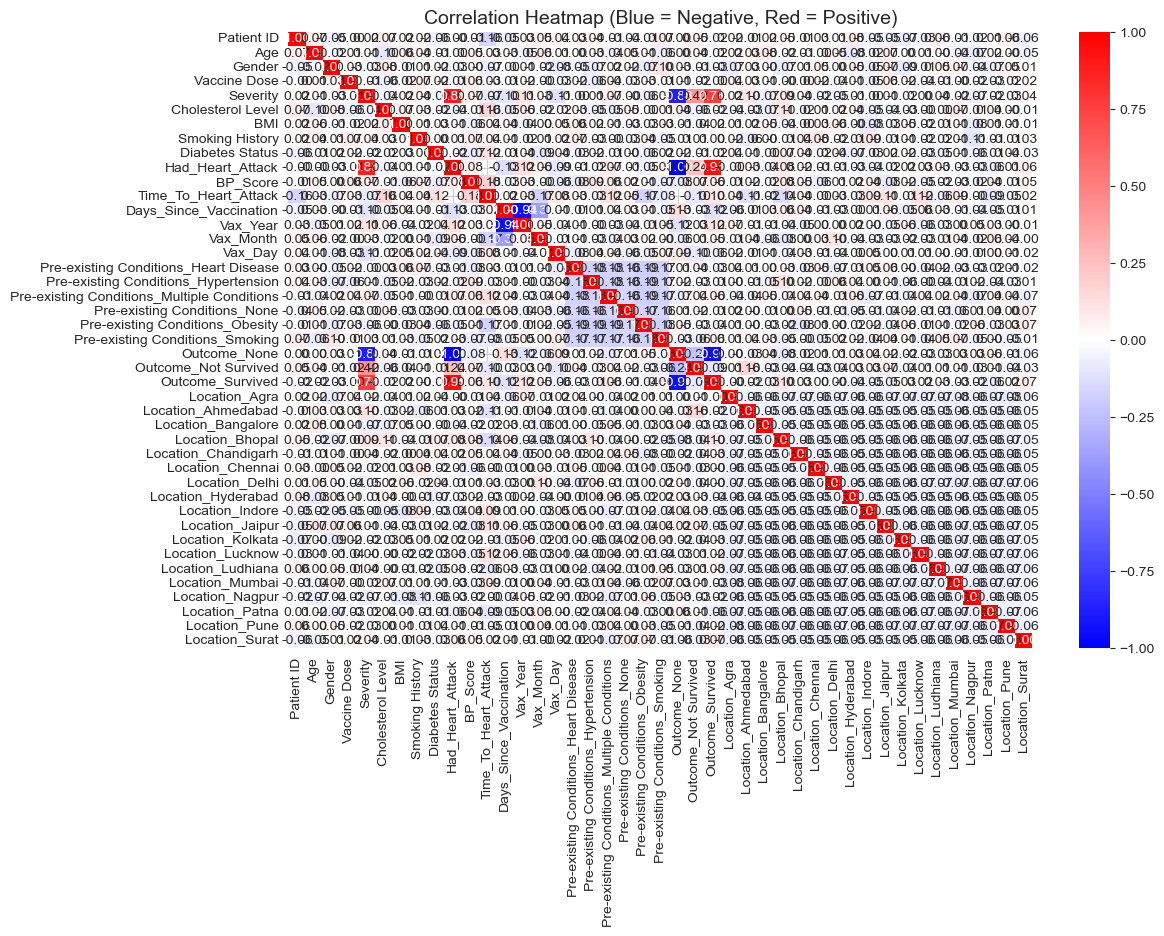

In [453]:
# Recompute the numeric-only dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

# Compute and plot correlation
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='bwr',center=0)
plt.title('Correlation Heatmap (Blue = Negative, Red = Positive)', fontsize=14)
plt.show()



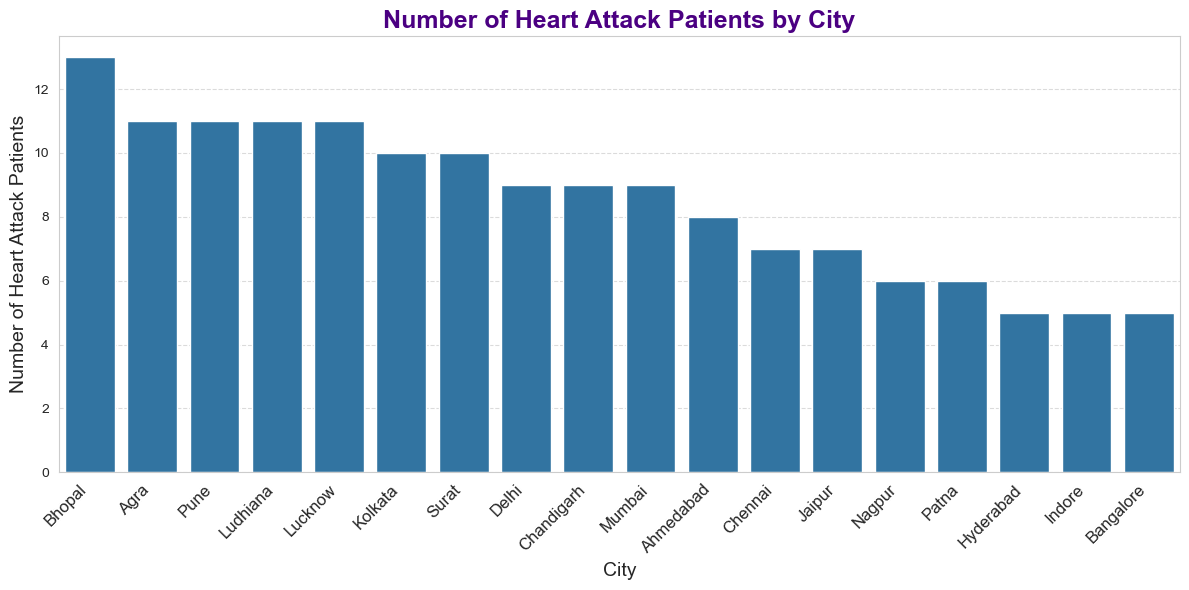

In [454]:
heart_attacks_by_city = df.groupby('Location')['Had_Heart_Attack'].sum().sort_values(ascending=False)

# Set plot style for better visuals
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_attacks_by_city.index, y=heart_attacks_by_city.values)

# Add titles and labels
plt.title('Number of Heart Attack Patients by City', fontsize=18, fontweight='bold', color='#4B0082')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Heart Attack Patients', fontsize=14 )

# Improve x-axis labels with better font rotation and alignment
plt.xticks(rotation=45, ha='right', fontsize=12,)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for a more polished look
plt.tight_layout()

# Show plot
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_16288\1324675139.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\pc\AppData\Local\Temp\ipykernel_16288\1324675139.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




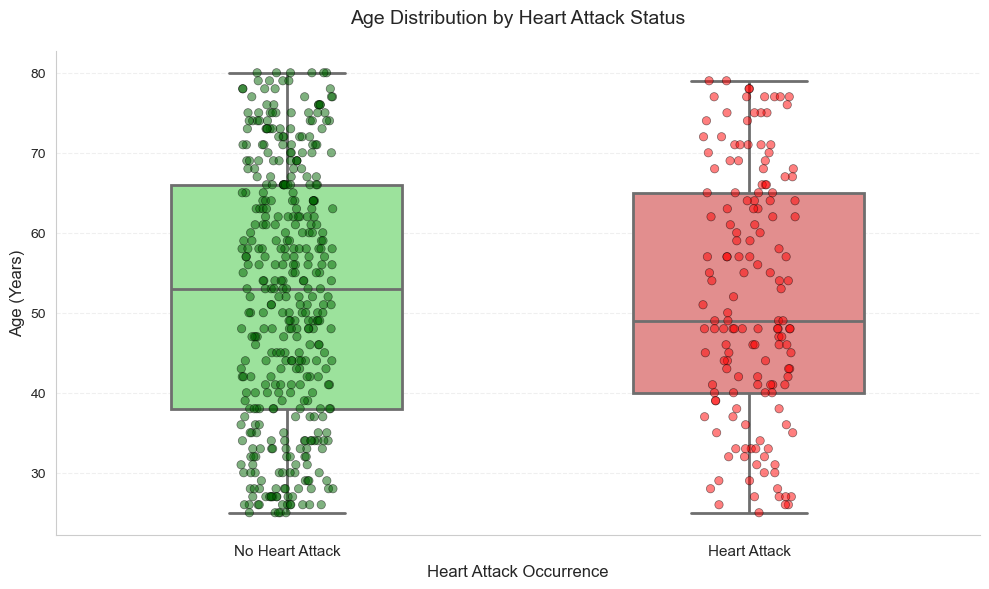

In [455]:
# plt.boxplot(df["Age"])
# # sns.stripplot(x = df["Age"], data=df, jitter=True, color='red', alpha=0.6)

# plt.title("Age Distribution")
# plt.ylabel("Age")
# plt.show()

# Convert 'Had_Heart_Attack' to categorical labels
df['Heart_Attack_Status'] = df['Had_Heart_Attack'].map({0: 'No Heart Attack', 1: 'Heart Attack'})

plt.figure(figsize=(10, 6))

# Create boxplot
boxplot = sns.boxplot(
    x='Heart_Attack_Status', 
    y='Age',
    data=df,
    palette={'No Heart Attack': 'lightgreen', 'Heart Attack': 'lightcoral'},
    width=0.5,
    linewidth=2,
    flierprops=dict(marker='o', markersize=8, markerfacecolor='grey')
)

# Add stripplot overlay
stripplot = sns.stripplot(
    x='Heart_Attack_Status',
    y='Age',
    data=df,
    jitter=True,
    alpha=0.5,
    size=6,
    palette={'No Heart Attack': 'darkgreen', 'Heart Attack': 'red'},
    edgecolor='black',
    linewidth=0.5
)

# Customize plot appearance
plt.title('Age Distribution by Heart Attack Status', fontsize=14, pad=20)
plt.xlabel('Heart Attack Occurrence', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.xticks(fontsize=11)

# # Add median value annotations
# medians = df.groupby('Heart_Attack_Status')['Age'].median()
# for xtick in boxplot.get_xticks():
#     plt.text(xtick, medians[xtick]+1, f'Median: {medians[xtick]:.0f}', 
#              ha='center', va='bottom', fontsize=11, color='black',
#              bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Improve grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

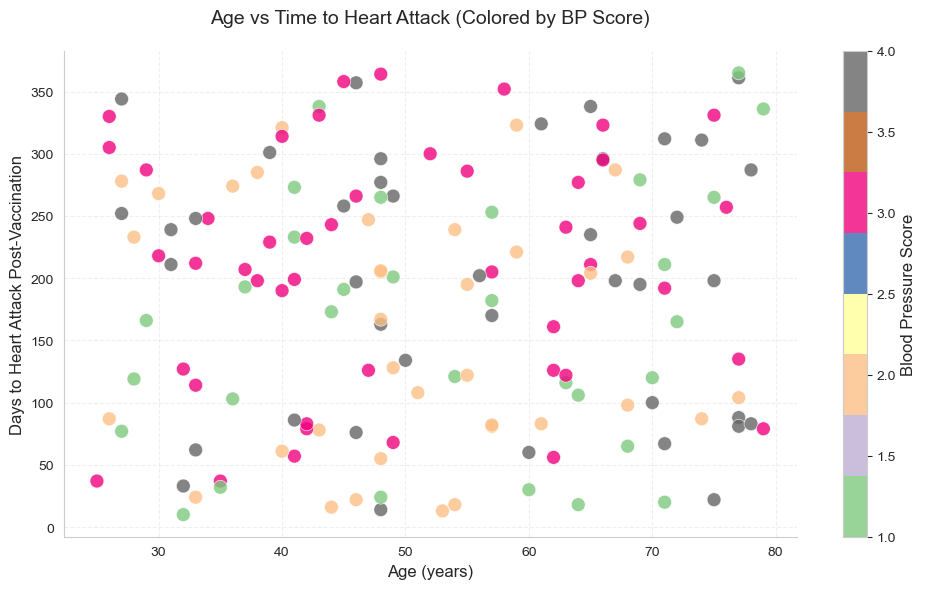

In [456]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create scatter plot with enhanced features
scatter = plt.scatter(
    df["Age"], 
    df["Time_To_Heart_Attack"],
    c=df["BP_Score"],  # Color by BP_Score
    cmap="Accent",    # Color map
    alpha=0.8,         # Transparency
    s=100,             # Marker size
    edgecolor='w',     # White edges
    linewidth=0.5      # Edge width
)

# Add labels and title
plt.title("Age vs Time to Heart Attack (Colored by BP Score)", fontsize=14, pad=20)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Days to Heart Attack Post-Vaccination", fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Blood Pressure Score', fontsize=12)


# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right spines
sns.despine()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

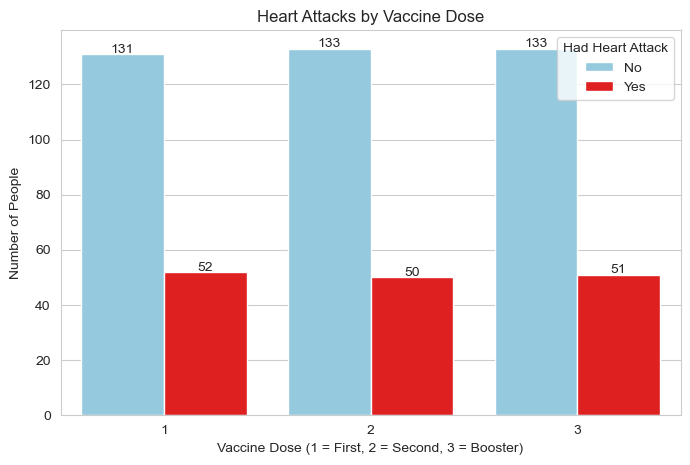

In [457]:
# sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Vaccine Dose', hue='Had_Heart_Attack', palette=['skyblue', 'red'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,   # x position
            height + 0.5,                     # y position
            int(height),                      # value to show
            ha="center", fontsize=10
        )

# Labels
plt.title('Heart Attacks by Vaccine Dose')
plt.xlabel('Vaccine Dose (1 = First, 2 = Second, 3 = Booster)')
plt.ylabel('Number of People')
plt.legend(title='Had Heart Attack', labels=['No', 'Yes'])

plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_16288\991973610.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




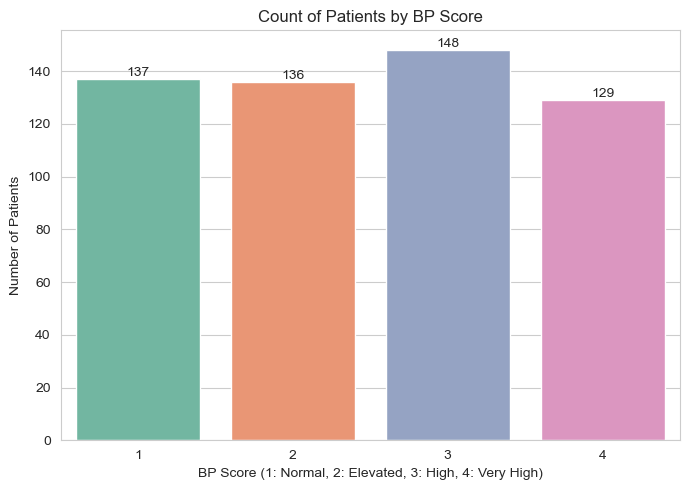

In [458]:
# Filter out the rows where BP_Score is not in the range of 1 to 4
filtered_df = df[df['BP_Score'].isin([1, 2, 3, 4])]

plt.figure(figsize=(7, 5))
sns.countplot(x='BP_Score', data=filtered_df, palette='Set2')

plt.title('Count of Patients by BP Score')
plt.xlabel('BP Score (1: Normal, 2: Elevated, 3: High, 4: Very High)')
plt.ylabel('Number of Patients')

# Add bar labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 1,
             int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()


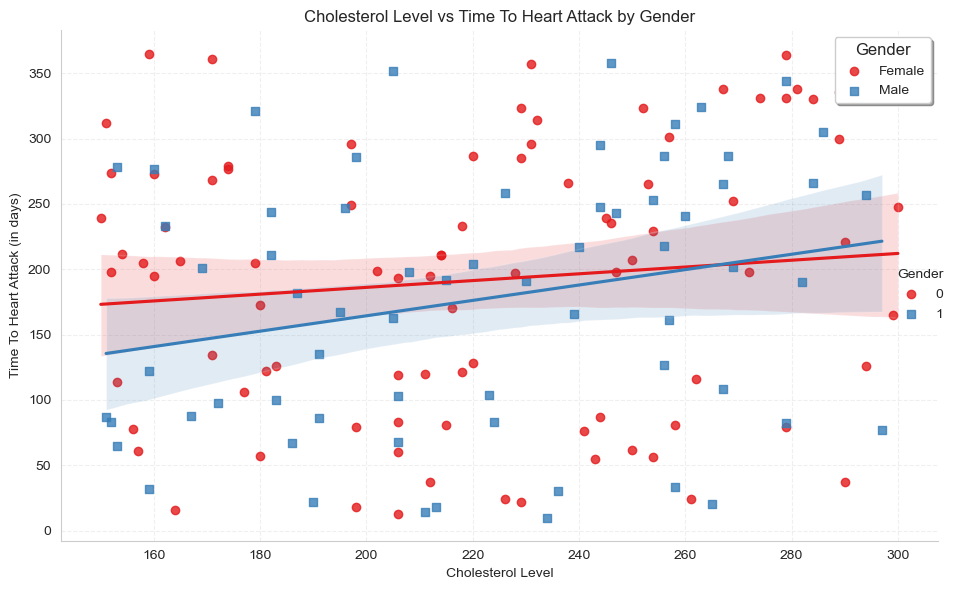

In [459]:
g = sns.lmplot(
   x='Cholesterol Level',
   y='Time_To_Heart_Attack',
   data=df[df["Had_Heart_Attack"] == 1],
   hue='Gender',
   palette='Set1',
   height=6,
   aspect=1.5,
   markers=["o", "s"]
)

# Access the underlying axes object
ax = g.ax

# Add labels and title
ax.set_title('Cholesterol Level vs Time To Heart Attack by Gender')
ax.set_xlabel('Cholesterol Level')
ax.set_ylabel('Time To Heart Attack (in days)')
ax.grid(True, linestyle='--', alpha=0.3)

# Fix legend (it's already there from hue, no need to reset manually)
# Just update the legend title if needed
# Update the legend with proper labels and title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender', loc='best', fontsize=10, title_fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


In [460]:
px.scatter(
    df, 
    x='Age', 
    y='Time_To_Heart_Attack', 
    color='Gender', 
    color_discrete_map={1: 'yellow', 0: 'blue'},
    labels={'Gender': 'Gender (Yellow: Male, Blue: Female)'}
)

## ML model Work


In [461]:
ss = StandardScaler()

In [462]:
cols = ['Age', 'Days_Since_Vaccination', 'BP_Score', 'Cholesterol Level', 'BMI', 'Vax_Year', 'Vax_Month']
for col in cols:
    df[col] = ss.fit_transform(df[[col]])

In [463]:
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Heart Attack Date,Severity,Location,Blood Pressure,Cholesterol Level,...,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Ludhiana,Location_Mumbai,Location_Nagpur,Location_Patna,Location_Pune,Location_Surat,Heart_Attack_Status
0,1,0.183325,0,2021-09-25,2,NaT,0,Chennai,Elevated,-0.789839,...,0,0,0,0,0,0,0,0,0,No Heart Attack
1,2,-1.585604,1,2023-07-12,2,NaT,0,Agra,Elevated,-1.692019,...,0,0,0,0,0,0,0,0,0,No Heart Attack
2,3,1.762727,1,2022-10-01,1,NaT,0,Surat,High,0.690662,...,0,0,0,0,0,0,0,0,1,No Heart Attack
3,4,-1.206548,1,2022-03-17,1,NaT,0,Hyderabad,Normal,-0.558511,...,0,0,0,0,0,0,0,0,0,No Heart Attack
4,5,-0.132555,0,2023-03-26,2,NaT,0,Mumbai,Normal,1.153319,...,0,0,0,0,1,0,0,0,0,No Heart Attack


In [464]:
numerical_features = [
    'Age',
    'Gender',                  # 0 = Female, 1 = Male
    'Vaccine Dose',             # 1=1st Dose, 2=2nd Dose, 3=Booster
    'Days_Since_Vaccination',  # Numeric
    'Vax_Year',                 # Optional but useful
    'Vax_Month',                # Optional
    'BP_Score',
    'Cholesterol Level',
    'BMI',
    'Smoking History',          # 0/1
    'Diabetes Status'           # 0/1
]


In [465]:

categorical_features = [
    # Pre-existing conditions
    'Pre-existing Conditions_Heart Disease',
    'Pre-existing Conditions_Hypertension',
    'Pre-existing Conditions_Multiple Conditions',
    'Pre-existing Conditions_None',
    'Pre-existing Conditions_Obesity',
    'Pre-existing Conditions_Smoking',
      
    # Location (one-hot)
    'Location_Agra',
    'Location_Bangalore',
    'Location_Bhopal',
    'Location_Chandigarh',
    'Location_Chennai',
    'Location_Delhi',
    'Location_Hyderabad',
    'Location_Indore',
    'Location_Jaipur',
    'Location_Kolkata',
    'Location_Lucknow',
    'Location_Ludhiana',
    'Location_Mumbai',
    'Location_Nagpur',
    'Location_Patna',
    'Location_Pune',
]


In [466]:
X = df[numerical_features + categorical_features]
y = df['Had_Heart_Attack']

In [467]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [468]:
RF = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
LG = LogisticRegression()

In [469]:
lg = LG.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [470]:
print("the accuracy score is :", accuracy_score(y_test, y_pred))
print("The Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))
print("precision score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))
print("F1 is ", f1_score(y_test, y_pred)    )
print(classification_report(y_test, y_pred))

the accuracy score is : 0.8
The Confusion Matrix is:
[[87  1]
 [21  1]]
precision score 0.5
Recall score 0.045454545454545456
F1 is  0.08333333333333334
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        88
           1       0.50      0.05      0.08        22

    accuracy                           0.80       110
   macro avg       0.65      0.52      0.49       110
weighted avg       0.74      0.80      0.73       110



In [471]:
rand_model = RF.fit(X_train,y_train)
y_pred_rf = rand_model.predict(X_test)


In [472]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Predictions:", y_pred_rf)
print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)

Random Forest Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Random Forest RMSE: 0.4572645941803379
Random Forest R²: -0.30681818181818166


In [473]:


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7909090909090909
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[87  1]
 [22  0]]


In [476]:
scaler = StandardScaler()

In [480]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your fully preprocessed DataFrame

# --- 1. DEFINE FEATURES (UPDATED - Vax_Day removed) ---
numerical_features = [
    'Age',
    'Gender',                  # 0 = Female, 1 = Male
    'Vaccine Dose',             # 1=1st Dose, 2=2nd Dose, 3=Booster
    'Days_Since_Vaccination',  # Numeric
    'Vax_Year',                 # Optional but useful
    'Vax_Month',                # Optional
    'BP_Score',
    'Cholesterol Level',
    'BMI',
    'Smoking History',          # 0/1
    'Diabetes Status'           # 0/1
]

categorical_features = [
    # Pre-existing conditions
    'Pre-existing Conditions_Heart Disease',
    'Pre-existing Conditions_Hypertension',
    'Pre-existing Conditions_Multiple Conditions',
    'Pre-existing Conditions_None',
    'Pre-existing Conditions_Obesity',
    'Pre-existing Conditions_Smoking',
    # Location (one-hot)
    'Location_Agra',
    'Location_Bangalore',
    'Location_Bhopal',
    'Location_Chandigarh',
    'Location_Chennai',
    'Location_Delhi',
    'Location_Hyderabad',
    'Location_Indore',
    'Location_Jaipur',
    'Location_Kolkata',
    'Location_Lucknow',
    'Location_Ludhiana',
    'Location_Mumbai',
    'Location_Nagpur',
    'Location_Patna',
    'Location_Pune',
]

X = df[numerical_features + categorical_features]
y = df['Had_Heart_Attack']

# --- 2. SPLIT DATA FIRST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. CORRECTLY FIT AND TRANSFORM THE SCALER ---
# Instantiate ONE scaler
scaler = StandardScaler()

# FIT the scaler ONLY on the training data's numerical features
scaler.fit(X_train[numerical_features])

# TRANSFORM the training data
X_train[numerical_features] = scaler.transform(X_train[numerical_features])

# TRANSFORM the test data using the SAME fitted scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# --- 4. TRAIN MODELS ---
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
LG = LogisticRegression(class_weight='balanced', random_state=42)

lg = LG.fit(X_train, y_train)
rand_model = RF.fit(X_train, y_train)


# --- 5. CREATE AND PREDICT ON A HIGH-RISK TEST CASE (UPDATED) ---
high_risk_row = {
    'Age': 70, 'Gender': 1, 'Vaccine Dose': 1, 'Days_Since_Vaccination': 400,
    'Vax_Year': 2022, 'Vax_Month': 6, # 'Vax_Day' removed here
    'BP_Score': 4, 'Cholesterol Level': 280, 'BMI': 32, 'Smoking History': 1, 'Diabetes Status': 1,
    'Pre-existing Conditions_Heart Disease': 1, 'Pre-existing Conditions_Hypertension': 1,
    'Pre-existing Conditions_Multiple Conditions': 0, 'Pre-existing Conditions_None': 0,
    'Pre-existing Conditions_Obesity': 0, 'Pre-existing Conditions_Smoking': 0,
    'Location_Agra': 0, 'Location_Bangalore': 0, 'Location_Bhopal': 0, 'Location_Chandigarh': 0,
    'Location_Chennai': 0, 'Location_Delhi': 1, 'Location_Hyderabad': 0, 'Location_Indore': 0,
    'Location_Jaipur': 0, 'Location_Kolkata': 0, 'Location_Lucknow': 0, 'Location_Ludhiana': 0,
    'Location_Mumbai': 0, 'Location_Nagpur': 0, 'Location_Patna': 0, 'Location_Pune': 0
}

# Convert to DataFrame
high_risk_df = pd.DataFrame([high_risk_row])

# Make sure all columns exist and are in the same order as X_train
for col in X_train.columns:
    if col not in high_risk_df.columns:
        high_risk_df[col] = 0
high_risk_df = high_risk_df[X_train.columns]

# Scale numeric features using the CORRECTLY fitted scaler
high_risk_df[numerical_features] = scaler.transform(high_risk_df[numerical_features])

# Make prediction
prediction_high = lg.predict(high_risk_df)
prediction_proba_high = lg.predict_proba(high_risk_df)

print("--- High-Risk Test Case Prediction ---")
print("Prediction (Had Heart Attack=1 / No=0):", prediction_high[0])
print("Prediction Probabilities [No Heart Attack, Heart Attack]:", prediction_proba_high[0])

--- High-Risk Test Case Prediction ---
Prediction (Had Heart Attack=1 / No=0): 1
Prediction Probabilities [No Heart Attack, Heart Attack]: [0. 1.]


In [481]:
low_risk_row = {
    'Age': 28, 'Gender': 0, 'Vaccine Dose': 2, 'Days_Since_Vaccination': 180,
    'Vax_Year': 2023, 'Vax_Month': 5, # 'Vax_Day' removed here
    'BP_Score': 1, 'Cholesterol Level': 165, 'BMI': 22.5, 'Smoking History': 0, 'Diabetes Status': 0,
    'Pre-existing Conditions_Heart Disease': 0, 'Pre-existing Conditions_Hypertension': 0,
    'Pre-existing Conditions_Multiple Conditions': 0, 'Pre-existing Conditions_None': 1,
    'Pre-existing Conditions_Obesity': 0, 'Pre-existing Conditions_Smoking': 0,
    'Location_Agra': 0, 'Location_Bangalore': 0, 'Location_Bhopal': 0, 'Location_Chandigarh': 0,
    'Location_Chennai': 0, 'Location_Delhi': 0, 'Location_Hyderabad': 0, 'Location_Indore': 0,
    'Location_Jaipur': 0, 'Location_Kolkata': 0, 'Location_Lucknow': 0, 'Location_Ludhiana': 0,
    'Location_Mumbai': 1, 'Location_Nagpur': 0, 'Location_Patna': 0, 'Location_Pune': 0
}

# Convert to DataFrame
low_risk_df = pd.DataFrame([low_risk_row])

# Make sure all columns exist and are in the same order as X_train
for col in X_train.columns:
    if col not in low_risk_df.columns:
        low_risk_df[col] = 0
low_risk_df = low_risk_df[X_train.columns]

# Scale numeric features using the CORRECTLY fitted scaler
low_risk_df[numerical_features] = scaler.transform(low_risk_df[numerical_features])

# Make prediction
prediction_low = lg.predict(low_risk_df)
prediction_proba_low = lg.predict_proba(low_risk_df)

print("\n--- Low-Risk Test Case Prediction ---")
print("Prediction (Had Heart Attack=1 / No=0):", prediction_low[0])
print("Prediction Probabilities [No Heart Attack, Heart Attack]:", prediction_proba_low[0])


--- Low-Risk Test Case Prediction ---
Prediction (Had Heart Attack=1 / No=0): 1
Prediction Probabilities [No Heart Attack, Heart Attack]: [0. 1.]


C:\Users\pc\AppData\Local\Temp\ipykernel_16288\34064864.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




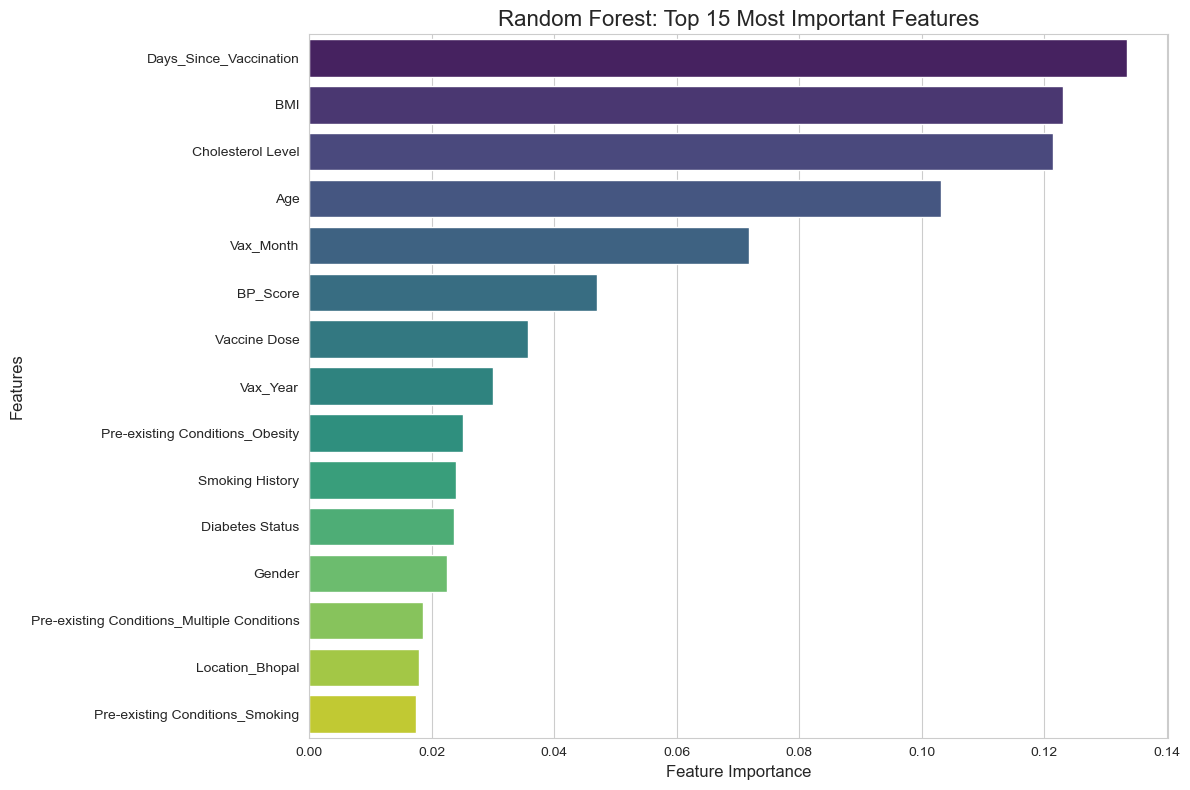

C:\Users\pc\AppData\Local\Temp\ipykernel_16288\34064864.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




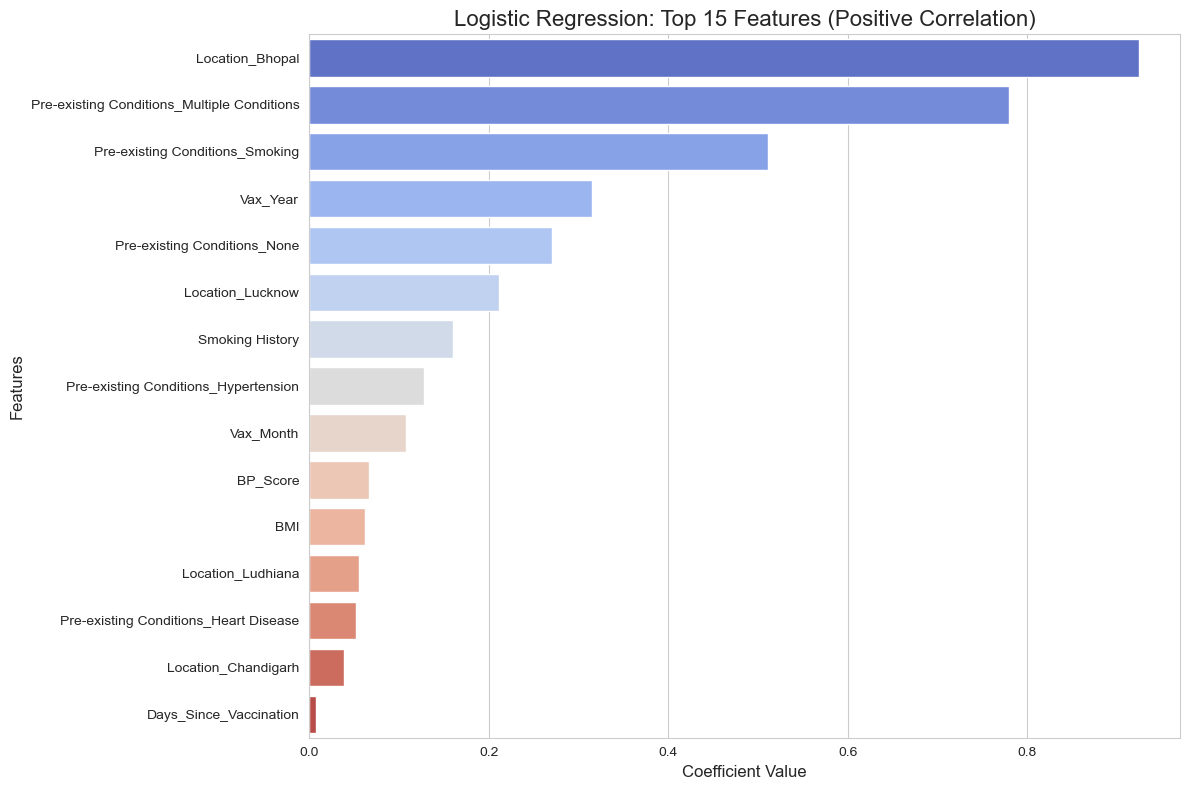

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style("whitegrid")

# --- Plot for Random Forest Feature Importance ---
rf_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rand_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_importances.head(15), palette='viridis')
plt.title('Random Forest: Top 15 Most Important Features', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# --- Plot for Logistic Regression Coefficients ---
# Coefficients show direction (positive or negative correlation)
lr_coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lg.coef_[0]
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=lr_coefficients.head(15), palette='coolwarm')
plt.title('Logistic Regression: Top 15 Features (Positive Correlation)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [483]:
import shap

# Create a SHAP explainer object
# We use the Random Forest model for this example
explainer = shap.TreeExplainer(rand_model)

# Calculate SHAP values for your low-risk test case
shap_values = explainer.shap_values(low_risk_df)

# The SHAP values for the positive class (Heart Attack = 1) are in shap_values[1]
shap.initjs() # This initializes the JavaScript visualization library

# Generate the force plot for the first (and only) prediction
shap.force_plot(explainer.expected_value[1], shap_values[1], low_risk_df)

ModuleNotFoundError: No module named 'shap'